In [1]:
%matplotlib inline

In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from e11 import run_file, H5Scan, H5Data
from e11.tools import add_level


# Introduction
---

`e11_analysis` is designed for processing experimental data stored in hdf5 files. 

This notebook introduces the core classes, `e11.H5Scan()` and `e11.H5Data()`, and provides an overview of their features. 
The two classes are written for two different structures of hdf5 files.  Both are instantiated using the path to the hdf5 file.

If the data file is saved in a `[base]\YYYY\MM\DD\rid\rid[ftype]` directory associated with a timestamp (e.g., `rid = YYYYMMDD_#`) then the path can be built using `e11.run_file()`.

In [3]:
from e11 import run_file
fil = run_file(base="Q:\E11_atmos\data", rid='20171127_155753', ftype="_data.h5", check=False)
print(fil)

Q:\E11_atmos\data/2017/11/27/20171127_155753/20171127_155753_data.h5


However, for the examples below we'll just use the example data.


# `e11.H5Scan()` 
---

In [4]:
print(H5Scan.__doc__)

 For hdf5 files that contain only datasets (no groups), e.g.

        root/
        ├── scope_0
        ├── scope_1
        └── analysis
    


We'll start by instantiating the class for the example data and then read the root attributes.

In [5]:
# hdf5 data file
fil = os.path.join(os.getcwd(), 'example_data', 'microwave_scan.h5')
scan = H5Scan(fil)
# root attributes
scan.attrs()

{'timestamp': '2018-02-05 16:11:48',
 'run_ID': '20180205_161148',
 'var': 'microwaves (GHz)',
 'option': ''}

In [6]:
scan.pprint()

file: 		 /home/adam/Git/e11_analysis/notebooks/example_data/microwave_scan.h5 
size: 		 0.32 MB 
datasets: 	 ['analysis', 'osc_0']


Next, let's list the datasets in the file.

In [7]:
scan.datasets()

['analysis', 'osc_0']

And get the attributes associated with one of the datasets.

In [8]:
scan.attrs('analysis')

{'A': 2.104375e-07,
 'B': 2.775e-08,
 'C': 5.018125e-07,
 'D': 4.85625e-07,
 'E': 5.480625e-07,
 'F': 9.041875e-07,
 'a0 ': (0, 0, 1),
 'a1': (0, 1, 1),
 'a2': (0, 2, 0),
 'f': 'a1- a0'}

The datasets can be accessed using `H5Scan.array(dataset)` for array data,

In [9]:
arr = scan.array('osc_0')
arr

array([[ 0.00052656,  0.00054219,  0.00054219, ..., -0.00243437,
        -0.00242656, -0.00244219],
       [ 0.00046406,  0.00047188,  0.00046406, ..., -0.00259844,
        -0.00259063, -0.00261406],
       [ 0.00046406,  0.00045625,  0.00044063, ..., -0.00248125,
        -0.00250469, -0.00249688],
       ...,
       [-0.00014531, -0.00014531, -0.00016094, ..., -0.00309844,
        -0.00309063, -0.00308281],
       [ 0.00047188,  0.00046406,  0.0004875 , ..., -0.00249688,
        -0.0025125 , -0.0025125 ],
       [ 0.00058125,  0.00056563,  0.00055781, ..., -0.00258281,
        -0.00258281, -0.00256719]])

Or `H5Scan.df(dataset)` for DataFrame data.


In [10]:
df = scan.df('analysis')
df.head()

,var,w0,w1,a0,a1,a2,f
measurement,,,,,,,
0,32.0500,777.950119,786.992730,0.000499,-0.005882,-1.118270,-0.006381
1,32.0505,777.950119,786.992729,0.000458,-0.006048,-1.122989,-0.006506
2,32.0510,777.950120,786.992729,0.000443,-0.005974,-1.138911,-0.006417
3,32.0515,777.950119,786.992729,0.000860,-0.005568,-0.995466,-0.006428
4,32.0520,777.950119,786.992729,0.000522,-0.005977,-1.095825,-0.006499


# `e11.H5Data()`
---

In [11]:
print(H5Data.__doc__)

 For hdf5 files that contain datasets within a single level of numbered groups, e.g.

        root/
        ├── 0/
        │   ├── image
        │   ├── scope_0
        │   ├── scope_1
        │   └── analysis
        ├── 1/
        │   ├── image
        │   ├── scope_0
        │         ⋮
        └──
    


Let's create an instance of `H5Data` using example data and then read the root attributes.

In [12]:
# hdf5 data file
fil = os.path.join(os.getcwd(), 'example_data', 'laser_data.h5')
data = H5Data(fil)
# root attributes
data.attrs()

{'RID': '20171201_163143',
 'SEQ File': 'Q:\\E11_atmos\\sequences\\testing\\wavelength_tri.jsq',
 'Author': 'AD',
 'Description': 'Linear up-down scan of DL pro 711 nm'}

In [13]:
# pretty print run info
data.pprint()

file: 		 /home/adam/Git/e11_analysis/notebooks/example_data/laser_data.h5 
size: 		 0.35 MB 
num groups: 	 64 
author: 	 AD 
description: 	 Linear up-down scan of DL pro 711 nm


The datasets in the hdf5 file are distributed within numbered groups, each identified by the `squid`.

In [14]:
data.squids

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64])

The attributes of a particular group can be accesed using the  `H5Data.attrs(squid)` method.

In [15]:
squid = 1
data.attrs(squid)

{'VAR:WL?1': 711.4608,
 'DATETIME': '2017-12-01 16:31:44',
 'LOOP': 1,
 'SQUID': 1,
 'OVERRIDE': 0,
 'ERROR': 0,
 'START': 3594990704.6397753,
 'END': 3594990714.6577516,
 'ACQUIRE': 10.0179762840271,
 'REC:WLM?1': 632.9910617145752,
 'REC:WLM?2': 711.4608014137556}

The attributes for all of the groups are collected together into a `pandas.DataFrame()` in the class property `H5Data.log`.

In [16]:
# log output
data.log.head()

100%|██████████| 64/64 [00:00<00:00, 1132.29it/s]


,ACQUIRE,DATETIME,END,ERROR,LOOP,OVERRIDE,REC:WLM?1,REC:WLM?2,START,VAR:WL?1,ELAPSED
squid,,,,,,,,,,,
1,10.017976,2017-12-01 16:31:44,3.594991e+09,0,1,0,632.991062,711.460801,3.594991e+09,711.4608,00:00:00
2,10.012825,2017-12-01 16:31:57,3.594991e+09,0,1,0,632.991062,711.460900,3.594991e+09,711.4609,00:00:13
3,10.015001,2017-12-01 16:32:10,3.594991e+09,0,1,0,632.991062,711.461001,3.594991e+09,711.4610,00:00:26
4,10.012057,2017-12-01 16:32:23,3.594991e+09,0,1,0,632.991062,711.461101,3.594991e+09,711.4611,00:00:39
5,10.021376,2017-12-01 16:32:37,3.594991e+09,0,1,0,632.991062,711.461201,3.594991e+09,711.4612,00:00:53


For very large files it can take several minuets to assemble `H5Data.log`. The log can be cached to a pickle file to speed up future acess (see `6)_Caching.ipynb`), or refreshed using the method `e11.H5Data.update_log()`.

In [17]:
# In our case, rebuilding the log doesn't take very long.
%time data.update_log()

100%|██████████| 64/64 [00:00<00:00, 932.86it/s]

CPU times: user 73.6 ms, sys: 7.76 ms, total: 81.3 ms
Wall time: 80.5 ms


The `H5Data.log` DataFrame is indexed using the `squid` value.  Each row contains the same information as `H5Data.attrs(squid)`.

In [18]:
squid = 1
data.log.loc[squid]

ACQUIRE                   10.018
DATETIME     2017-12-01 16:31:44
END                  3.59499e+09
ERROR                          0
LOOP                           1
OVERRIDE                       0
REC:WLM?1                632.991
REC:WLM?2                711.461
START                3.59499e+09
VAR:WL?1                 711.461
ELAPSED          0 days 00:00:00
Name: 1, dtype: object

Experimental settings are stored in the log as `VARS`; measurements are stored as `RECS`.

In the example data file, these are values sent to a laser controller (`VAR:WL?1`) and measured laser wavelengths (`REC:WLM?1/2`, channel one/ two).

In [19]:
# combine VAR and REC data
df = add_level(data.var, 'VAR').join(add_level(data.rec, 'REC'))
df.head()

VAR         REC            
           WL?1       WLM?1       WLM?2
squid                                  
1      711.4608  632.991062  711.460801
2      711.4609  632.991062  711.460900
3      711.4610  632.991062  711.461001
4      711.4611  632.991062  711.461101
5      711.4612  632.991062  711.461201

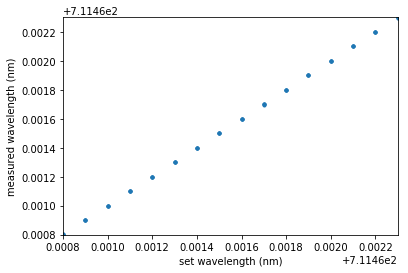

In [20]:
# plot
fig, ax = plt.subplots()

# data
xvals = df[('VAR', 'WL?1')]    # laser wavelength PID reference
yvals = df[('REC', 'WLM?2')]   # measured wavelength
ax.scatter(xvals, yvals, marker='.')

# format
ax.set_xlim([xvals.min(), xvals.max()])
ax.set_ylim([yvals.min(), yvals.max()])
ax.set_xlabel('set wavelength (nm)')
ax.set_ylabel('measured wavelength (nm)')

# output
plt.show()

We can list the datasets in a particular group with `H5Data.datasets(squid)`.

In [21]:
squid = 1
data.datasets(squid)

['WLM']

And to read the attributes of a particular dataset we use `H5Data.attrs(squid, dataset)`,

In [22]:
data.attrs(squid, 'WLM')

{'type': 7,
 'version': 1767,
 'active channels': 'ch1,ch2',
 'refresh (ms)': 500,
 'squid': 1}

The raw data can be accessed using `H5Data.array(squid, dataset)` for array data, or `H5Data.df(squid, dataset)` for DataFrame data.

See `2)_Raw_datasets.ipynb` for more examples.